# **Regresi SVM**

### Langkah 1: Menghubungkan Google Drive ke Colab

In [1]:
from google.colab import drive
# Mount Google Drive untuk mengakses file
# Jalankan sel ini untuk menghubungkan ke Google Drive Anda
drive.mount('/content/drive')

Mounted at /content/drive


### Langkah 2: Membaca file CSV dari Google Drive ke DataFrame

In [2]:
import pandas as pd

# Path ke file CSV di Google Drive
file_path = '/content/drive/MyDrive/week 9/MaterialStrength.csv'

# Membaca file CSV ke dalam DataFrame
data = pd.read_csv(file_path)

# Menampilkan 5 baris pertama untuk memverifikasi data
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,target_feature
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,0.300000,540.0,1.538462,1,0.350044,YEs,NO,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,0.300000,540.0,1.560651,1,0.452416,yES,nOO,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,0.685714,475.0,1.569024,0,6.704743,yEs,NO,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,0.685714,475.0,1.569024,0,8.891596,yes,NOO,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,0.966767,331.0,1.185221,0,8.126411,YeS,no,44.30


### Tahapan 3: Preparation data dan memilih subset prediktor serta menetapkan variabel target dari DataFrame


In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Identifikasi prediktor dan target setelah analisis dataset
categorical_features = ['x14', 'x15']
numerical_features = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13']

# Encode kolom kategorikal
encoder = LabelEncoder()
for col in categorical_features:
    data[col] = encoder.fit_transform(data[col])

# Gabungkan fitur kategorikal dan numerik
predictors = categorical_features + numerical_features
X = data[predictors]

# Tetapkan kolom target sebagai variabel target
target = 'target_feature'
y = data[target]

# Standarisasi data numerik
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

<ipython-input-3-1119e44cb802>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_features] = scaler.fit_transform(X[numerical_features])


### Tahapan 4: Membagi data menjadi pelatihan dan pengujian


In [4]:
X_train, test_features, y_train, test_targets = train_test_split(X, y, test_size=0.2, random_state=42)

### Tahapan 5: Melatih model menggunakan SVM Regression dan mengevaluasi hasilnya


In [5]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Membuat model SVM Regressor
svm_model = SVR()

# Melatih model
svm_model.fit(X_train, y_train)

# Melakukan prediksi
y_pred = svm_model.predict(test_features)

# Evaluasi hasil
mae = mean_absolute_error(test_targets, y_pred)
mse = mean_squared_error(test_targets, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(test_targets, y_pred)

# Menampilkan metrik evaluasi
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 8.42440204724871
Mean Squared Error (MSE): 106.2177342423424
Root Mean Squared Error (RMSE): 10.306198826063001
R-squared (R²): 0.5877871219116948



### **Kesimpulan**
**MAE** dan **RMSE** mengindikasikan bahwa model memiliki kesalahan prediksi rata-rata yang cukup signifikan, yaitu antara 8.42 hingga 10.31 satuan, dengan RMSE yang lebih tinggi dibandingkan MAE karena mempertimbangkan kesalahan kuadrat. Nilai R² sebesar 0.59 menunjukkan bahwa model hanya mampu menjelaskan 59% dari variasi data target, yang mengindikasikan performa yang cukup baik namun masih memerlukan peningkatan. Besarnya kesalahan prediksi yang terlihat dari MSE dan RMSE menunjukkan perlunya penyetelan parameter lebih lanjut atau eksplorasi fitur tambahan untuk meningkatkan kinerja model.


### Tahapan 6: Membuat gridsearch parameter untuk menemukan parameter terbaik untuk SVM Regression


In [6]:
from sklearn.model_selection import GridSearchCV

# Menentukan parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# GridSearchCV untuk optimasi
parameter_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='r2', verbose=3)

# Melatih grid search
parameter_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Best Parameters:", parameter_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.580 total time=   0.1s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.585 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.724 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.655 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.562 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.111 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.100 total time=   0.1s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.119 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.118 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.102 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.163 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=scale, kernel=poly

### **Kesimpulan**
Kombinasi parameter C=**100**, gamma='scale', dan kernel='rbf' memungkinkan model SVM Regression mencapai performa optimal pada dataset MaterialStrength. Parameter C=**100** memprioritaskan kesalahan rendah pada data pelatihan untuk meningkatkan akurasi, meskipun berpotensi menyebabkan overfitting. Parameter gamma='scale' menjaga stabilitas dan adaptasi kernel RBF secara otomatis, sementara kernel='rbf' memungkinkan model menangkap pola non-linear yang kompleks dalam data. Jika hasil evaluasi menunjukkan performa yang baik, seperti MAE dan RMSE yang rendah serta R² yang tinggi, maka kombinasi parameter ini dapat dianggap cocok untuk data tersebut. Namun, penting untuk menguji generalisasi model pada data lain guna memastikan tidak terjadi overfitting.








### Tahapan 7: Mengevaluasi hasil menggunakan parameter terbaik dan visualisasinya


Best Model - Mean Absolute Error (MAE): 4.6780226208381865
Best Model - Mean Squared Error (MSE): 40.74076312699596
Best Model - Root Mean Squared Error (RMSE): 6.382849138668089
Best Model - R-squared (R²): 0.8418920593262077


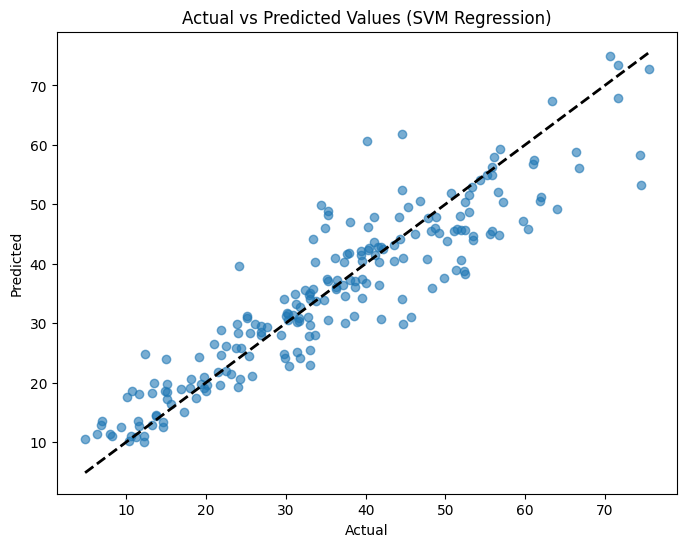

In [7]:
import matplotlib.pyplot as plt

# Melakukan prediksi dengan model terbaik
best_model = parameter_search.best_estimator_
predicted_values = best_model.predict(test_features)

# Evaluasi model terbaik
mean_absolute_error_best = mean_absolute_error(test_targets, predicted_values)
mean_squared_error_best = mean_squared_error(test_targets, predicted_values)
rmean_squared_error_best = np.sqrt(mean_squared_error_best)
r2_score_best = r2_score(test_targets, predicted_values)

# Menampilkan metrik evaluasi terbaik
print("Best Model - Mean Absolute Error (MAE):", mean_absolute_error_best)
print("Best Model - Mean Squared Error (MSE):", mean_squared_error_best)
print("Best Model - Root Mean Squared Error (RMSE):", rmean_squared_error_best)
print("Best Model - R-squared (R²):", r2_score_best)

# Visualisasi hasil prediksi vs aktual
plt.figure(figsize=(8, 6))
plt.scatter(test_targets, predicted_values, alpha=0.6)
plt.plot([test_targets.min(), test_targets.max()], [test_targets.min(), test_targets.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values (SVM Regression)")
plt.show()

### **Kesimpulan**
Model **SVM Regression** menunjukkan performa yang sangat baik, dengan **MAE**, **MSE**, dan **RMSE** yang rendah, mengindikasikan bahwa model berhasil memprediksi nilai target dengan kesalahan yang kecil. Nilai R² sebesar 0.84 menunjukkan bahwa model mampu menjelaskan 84% variasi dalam data target, yang merupakan indikasi performa yang sangat baik. Visualisasi antara nilai aktual dan prediksi juga mengonfirmasi bahwa hasil prediksi model sudah mendekati nilai aktual dengan distribusi yang baik. Peningkatan performa ini dicapai melalui pemilihan parameter terbaik, yaitu **C=100**, gamma='scale', dan kernel='rbf', yang memungkinkan model lebih optimal dalam menangkap pola data. Dengan kombinasi parameter ini, model SVM Regression dapat dianggap cukup baik dan layak digunakan untuk memprediksi target pada dataset ini.